<a href="https://colab.research.google.com/github/AlphaLock/Classification-Project-Predicting-Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title:**
Predicting Customer Churn

# **Project Scenario**

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#**Project Description**

Customer churn refers to the number or percentage of customers who stop doing business with a company over a given period. In other words, it is the rate at which customers leave or discontinue using a company's products or services. Churn can be caused by various reasons such as dissatisfaction with the product or service, competitive offerings, changes in customer needs, or external factors. Understanding and managing customer churn is important for businesses as it can have a significant impact on revenue, growth, and customer satisfaction. In this project we are going to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#**Hypothesis**
**Null:** Customers who have been with the company for a longer period of time are less likely to churn than customers who have been with the company for a shorter period of time.

**Altenative:** Customer churn does not depend on the period the Customer has been with the company.

# **Business Questions**

1. What is the overall churn rate for the company?
2. What are the demographics of customers who churned compared to those who did not?
3. How can the company reduce churn rate and retain more customers?

#**Importing Libraries**

In [80]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
import pickle


import warnings
warnings.filterwarnings("ignore")


%matplotlib inline


#**Loading the dataset from google drive**

In [2]:
drive.mount('/content/drive', force_remount=True)
customer = pd.read_csv('/content/drive/MyDrive/Azubi/lp3/Customer_Churn.csv')


Mounted at /content/drive


In [3]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# set customerID column as index
 
customer.set_index('customerID')



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


#**Exploratory Data Analysis**



In [5]:
# check the basic info of the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Statistical distribution of the dataset
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The dataset contains 21 columns and  rows

In [7]:
# check the datatype

customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The Total Charges column is object instead of float this would be changed to numeric datatyppe

In [8]:
# Convert the dtype of TotalCharges column from object to numeric
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')

In [9]:
customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
#check for missing values

customer.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see we have 11 mising values in the TotalCharges column. Therefore we are going to drop them since the quantity is not huge enough to affect our danalysis

In [11]:
customer.dropna(subset=['TotalCharges'], inplace=True)

#**Univariate Analysis**

In [12]:
# Ananlyze the Churn column

customer["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

From the above a total of 1869 customers churned

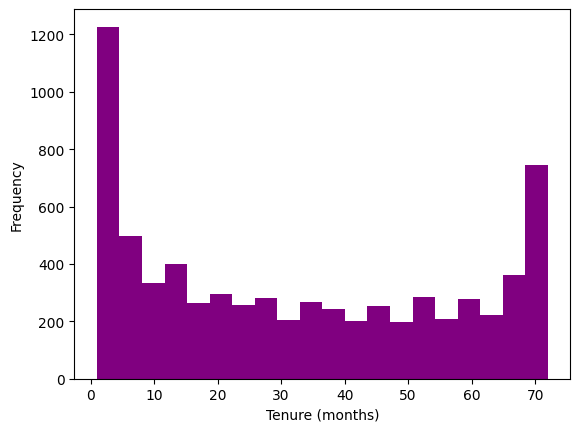

In [13]:


# Create a histogram of the Tenure column
plt.hist(customer['tenure'], bins=20, color='purple')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

From the above chart we could see that the company get a lot of new customers signing up for services. Most of which stay up to about 74 months before churning.

**Now lets see thier distribution according to gender**

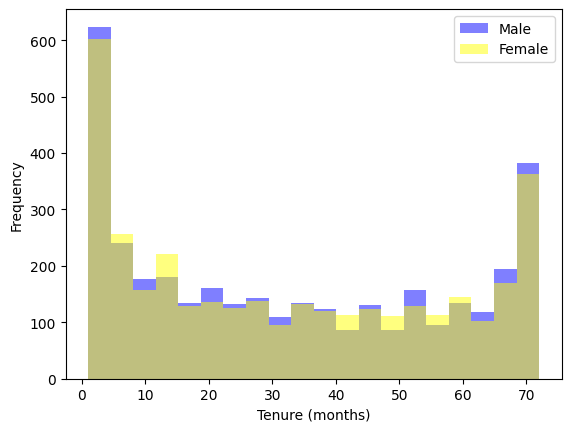

In [14]:

# separate the data into two categories based on gender
male_tenure = customer.loc[customer['gender'] == 'Male', 'tenure']
female_tenure = customer.loc[customer['gender'] == 'Female', 'tenure']

# create a histogram with two colors
plt.hist(male_tenure, bins=20, color='blue', alpha=0.5, label='Male')
plt.hist(female_tenure, bins=20, color='yellow', alpha=0.5, label='Female')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


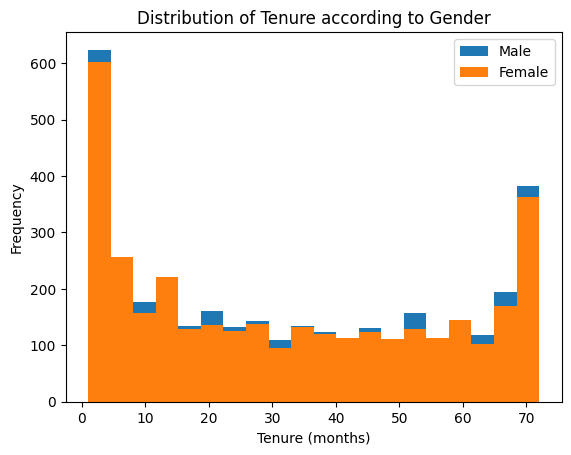

In [15]:

# separate the data into two categories based on gender
male_tenure = customer.loc[customer['gender'] == 'Male', 'tenure']
female_tenure = customer.loc[customer['gender'] == 'Female', 'tenure']

# create a histogram with two colors
plt.title("Distribution of Tenure according to Gender")
plt.hist(male_tenure, bins=20, label='Male')
plt.hist(female_tenure, bins=20,  label='Female')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [16]:
# Analyze Customers who have partners and those who do not

customer["Partner"].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

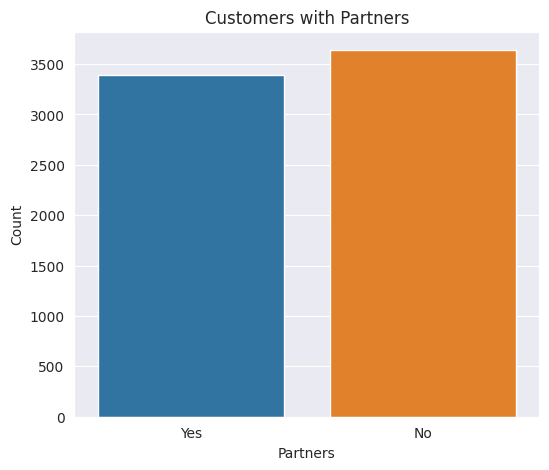

In [65]:
plt.figure(figsize=(6, 5))

sns.countplot(x='Partner', data=customer)
plt.title("Customers with Partners")
plt.xlabel('Partners')
plt.ylabel('Count')
plt.show()

From the graph, about 3641 customers have no partners whereas 3402 customers have partners.

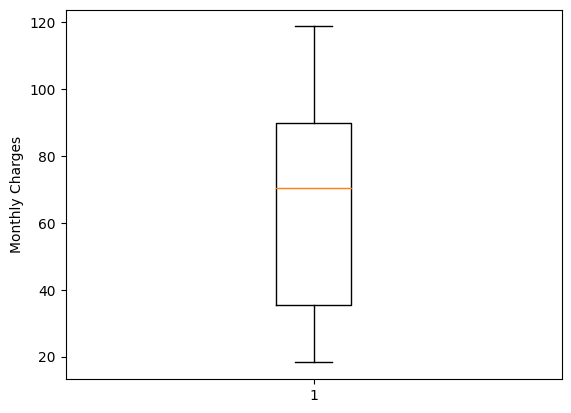

In [18]:
# Create a box plot of the MonthlyCharges column
plt.boxplot(customer['MonthlyCharges' ])
plt.ylabel('Monthly Charges')
plt.show()


From the boxplot one can see that the company's montlhy charges ranges between 39 to 90 dollars with some few outliers of a lower charge of 19 dollars and a higher charge of 190 dollars.

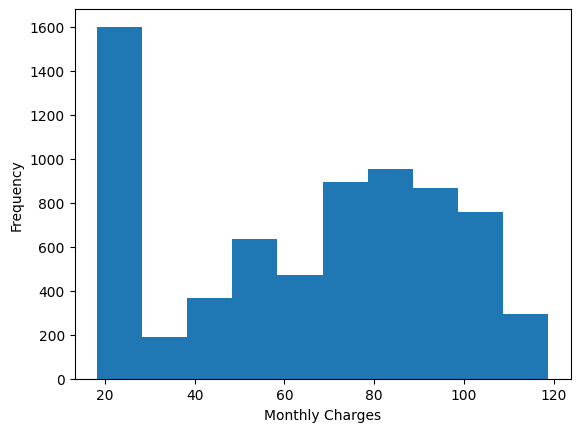

In [19]:
# Load the dataset

# Create a histogram of the MonthlyCharges column
plt.hist(customer['MonthlyCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


A histogram displaying the distribution of monthly charges 

**Lets take a look at the TotalCharges column**

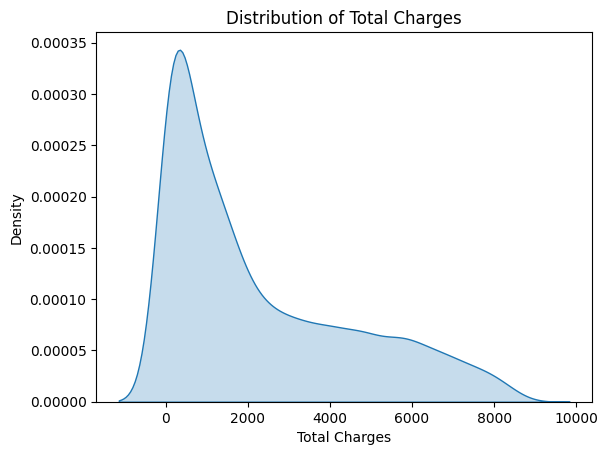

In [20]:
#sns.kdeplot(customer['TotalCharges'], shade=True)
sns.kdeplot(customer['TotalCharges'], fill=True)
plt.title("Distribution of Total Charges")
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()


Total Charged ranges from 0.00000 dollars to about 9999 dollars with lot more bills hovering around about 500 dollars per month.

**Now lets take a look at the churn column itself**

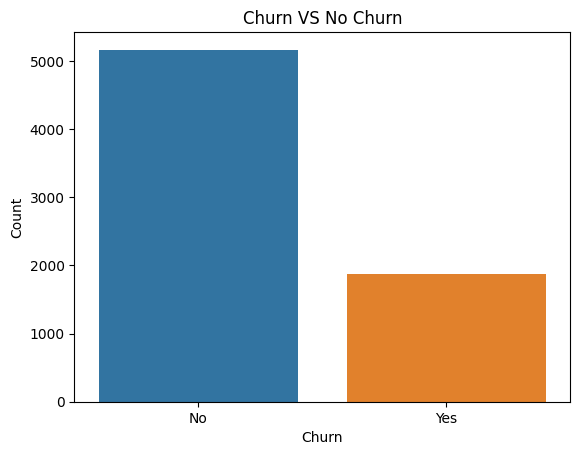

In [21]:
sns.countplot(x='Churn', data=customer)
plt.title("Churn VS No Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


From the above graph out of about 7043 customers, about 1999 of them churned.

**Now lets take a look at the various types of contracts** 

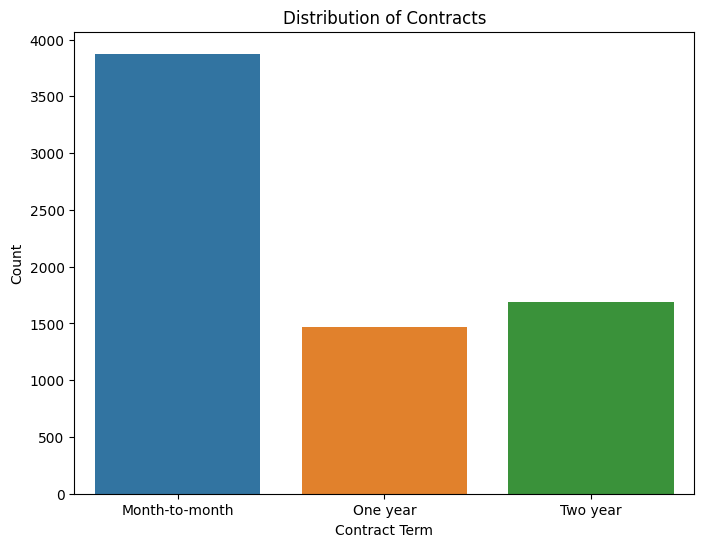

In [22]:

# Plot the distribution of the Contract column
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=customer)
plt.title('Distribution of Contracts')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.show()


#**Bivariate Analysis**

**Lets see the relationship between Monthly charge and Total Charge and Customer Churn** 

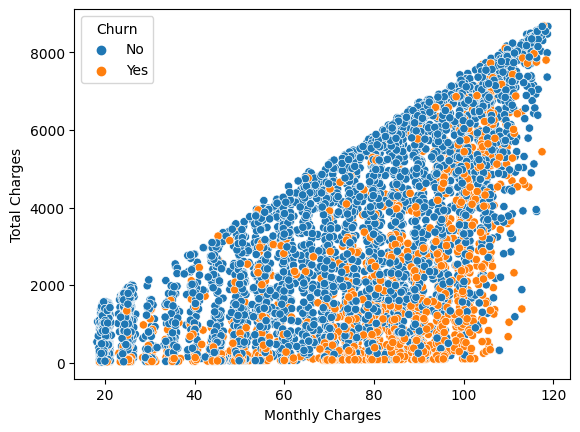

In [23]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=customer, hue="Churn")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


From the scatter plot one could identify that lot more customers churned when their monthly bills were rising between 70 to about 105 dollars. However lot more customers stayed when their Total Charges were rather going high.

In [24]:
#sns.boxplot(x='Churn', y='MonthlyCharges', data=customer);


**Lets check the relationship between Contract type and Customer Churn**

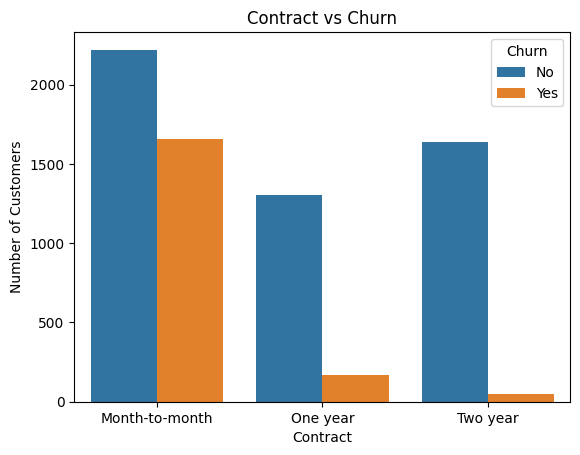

In [25]:
sns.countplot(x='Contract', hue='Churn', data=customer)
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()


We noticed that the longer the contract duration, the lower the churn rate. This might probably be due to the fact that customers pay more when they sign on to Monthly contracts.

Lets check the relationship between payment shedule and Churn

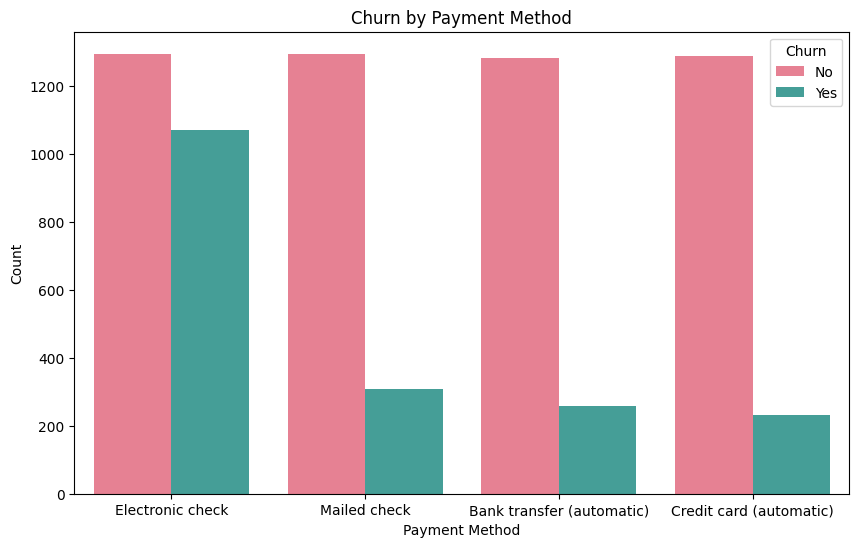

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=customer, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


From the chart we realised that customers with automated forms of payment such as Bank tranfer and Credit card had the lowest churn as compared to electronic check and mailed check.

**Lets check the relationship between Tenure and Churn**

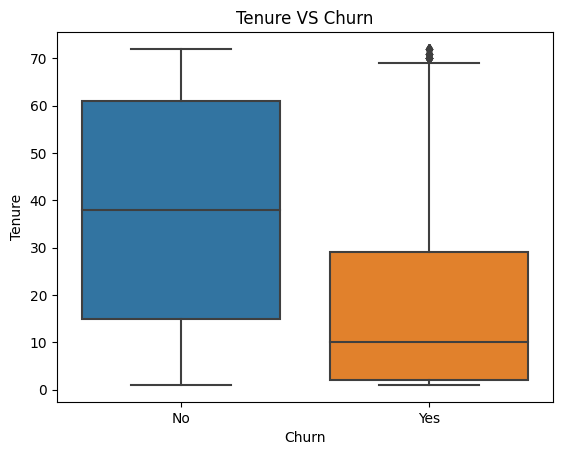

In [27]:
sns.boxplot(x='Churn', y='tenure', data=customer)
plt.title('Tenure VS Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure');


From the boxplot we could see that most customers churned before reaching their 40th month. This should be critically looked at.

**Lets also check the relationship between Senior Citizens and Churn**

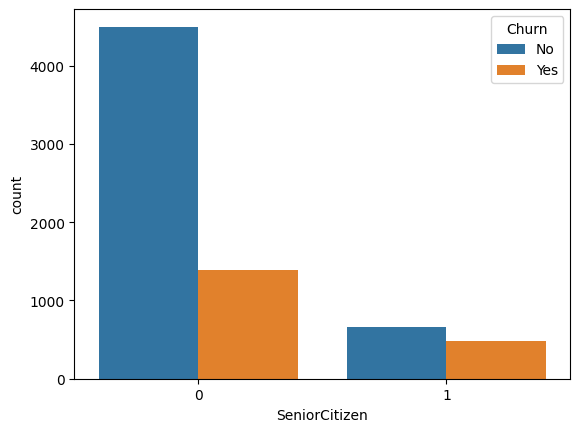

In [28]:

sns.countplot(x='SeniorCitizen', hue='Churn', data=customer);


The column chart above shows that Senior citizens who signed up with the company churned more as compared to non senior citizens. This might be due to old age and problably death.

**Lets check the relationship between internet service and churn**

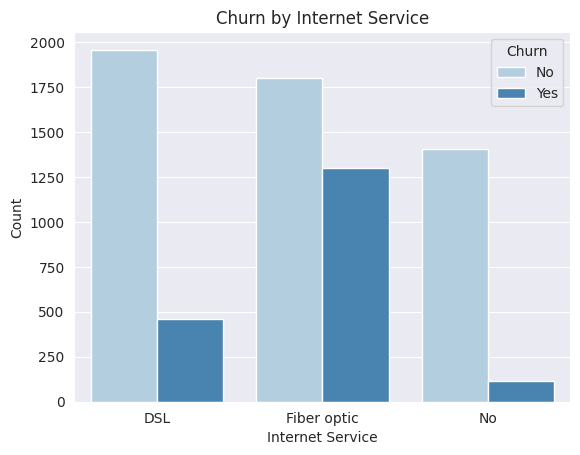

In [29]:
sns.set_style('darkgrid')

# Create a stacked bar plot
sns.countplot(x='InternetService', hue='Churn', data=customer, palette='Blues')

# Set the title and axis labels
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')

# Display the plot
plt.show()


The stacked bar chart above shows that the fibre optic subscribers churned the more also customers without internet do not churn as much as those with internet subscriptions.

#**Multivariate Analysis**

 Lets create a heatmap to visualize the correlation between all numerical columns in the dataset. This can help us identify any strong positive or negative correlations between different features.

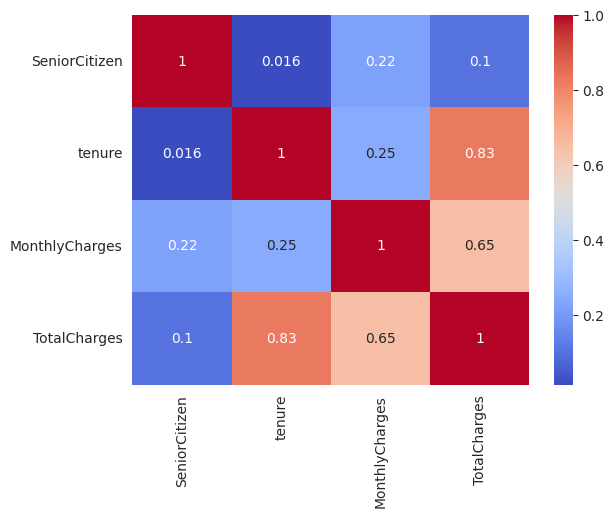

In [30]:
# Create correlation matrix
corr = customer.corr(numeric_only=True)

corr = customer.corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');


From the above heatmap, we can see that there is a strong positive correlation between TotalCharges and Tenure, which makes sense as customers who have been with the company for a longer time will have paid more in total charges. On the other hand, there is a negative correlation between MonthlyCharges and Tenure, which suggests that as the tenure of a customer increases, the monthly charges tend to decrease. This could be due to promotions or discounts offered to customers who have been with the company for a longer time.

**Let's create a pairplot to visualize the relationship between all numerical columns in the dataset. This can help us identify any patterns or trends in the data.**

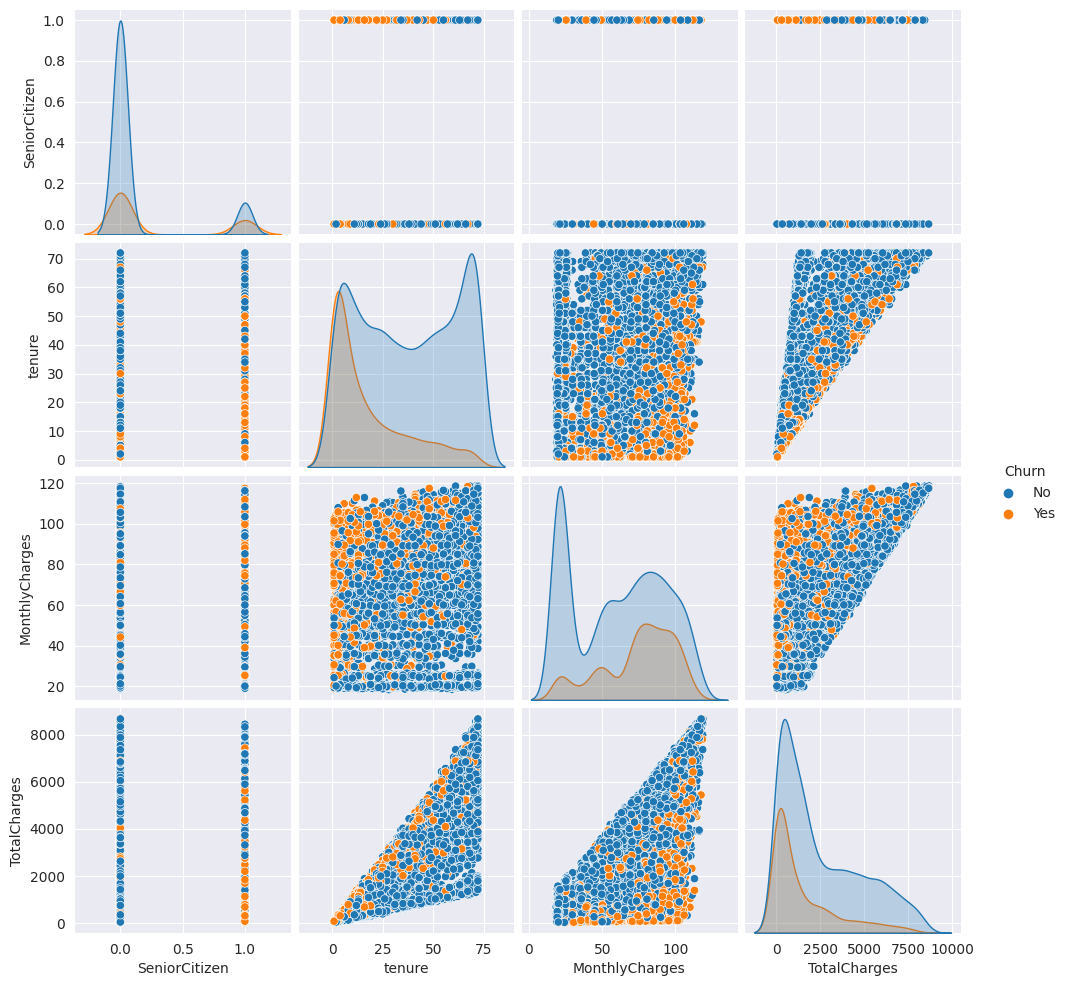

In [31]:

sns.pairplot(customer, hue='Churn')


The scatter plot of MonthlyCharges vs TotalCharges shows a positive correlation between the two columns, indicating that as monthly charges increase, so do total charges. The scatter plot of Tenure vs TotalCharges also shows a positive correlation, indicating that as the number of months a customer has been with the company increases, so does their total charges.

The diagonal plots show the distribution of each column. For example, we can see that the distribution of Tenure is skewed to the right, indicating that there are more customers with shorter tenures. The distribution of MonthlyCharges is roughly bell-shaped, indicating a normal distribution.

**Lets create a boxplot to help us compare the distribution of MonthlyCharges for different contract types and churn groups.**

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

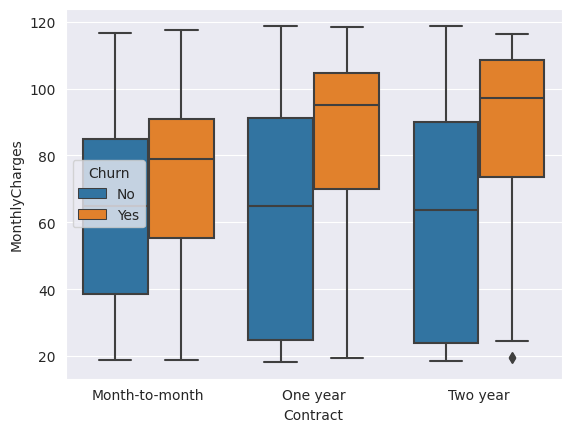

In [32]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=customer)

From the plot, we can see that customers with month-to-month contracts have a wider distribution of monthly charges compared to customers with one-year or two-year contracts. Additionally, the median monthly charge is highest for customers with month-to-month contracts who churned, followed by customers with one-year contracts who churned. Customers with two-year contracts have the lowest median monthly charges for both churn and non-churn groups. This suggests that customers with shorter-term contracts, particularly those on month-to-month contracts, may be more likely to churn if their monthly charges are high.

#**Data Cleaning**

#**Issues With Data And How They Were Resolved**

The customerID column has no impact on our analysis therefore we are going to drop it

In [33]:
customer.drop("customerID", axis=1, inplace= True )

# **Answering Business Questions**

**Question 1.** What is the overall churn rate for the company.

In [34]:
churn_rate = customer['Churn'].value_counts(normalize=True)['Yes']
print("Overall Churn Rate: {:.2f}".format(churn_rate))

Overall Churn Rate: 0.27


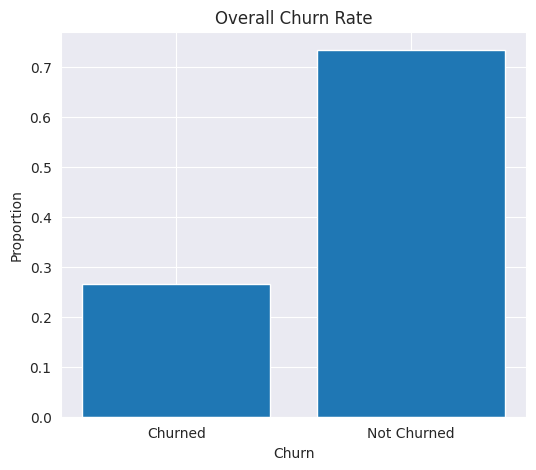

In [66]:
# Graphical representation of the churn rate

plt.figure(figsize=(6,5))

churn_rate = customer['Churn'].value_counts(normalize=True)['Yes']

plt.bar(['Churned', 'Not Churned'], [churn_rate, 1-churn_rate])
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.title('Overall Churn Rate')
plt.show()

The Total Churn rate of the company is 27%, where as the rate of customers who did not churn stood at 77%

#**Save The Cleaned Dataset Into A New CSV File**

In [36]:
customer.to_csv("df.csv", index= False)

In [37]:
#load the new file

df=pd.read_csv("df.csv")

#check the head()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Machine Learning and Modelling**


# **Feature Processing and Engineering**

Feature engineering involves transforming and creating new features from the existing data to enhance the predictive power of the model.

**Drop duplicate values**

In [38]:
#Lets check the shape of the dataset first
df.shape[0]

7032

In [39]:
# Lets check for duplicates
df.duplicated().any().sum()

1

In [40]:
# drop duplicate values

df.drop_duplicates(inplace=True, keep='first')

In [41]:
#  recheck the shape

df.shape[0]

7010

In [42]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Replacing mising values using simple imputer**

In [43]:
imputer = SimpleImputer(strategy='most_frequent')

#Fit the imputer to the data, focusing on the "Tenure Category" column:
imputer.fit(df[['tenure']])

 #Transform the data by replacing the missing values with the imputed values:

df[['tenure']] = imputer.transform(df[['tenure']])


In [44]:
#check again for missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **Creating New Features**

In [45]:
# Create a new feature for the ratio of MonthlyCharges to TotalCharges
df['MonthlyChargesRatio'] = df['MonthlyCharges'] / df['TotalCharges']

# Calculate the average MonthlyCharges for each customer
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']

# Create a new feature indicating whether the customer has both online security and backup
df['HasSecurityAndBackup'] = (df['OnlineSecurity'] == 'Yes') & (df['OnlineBackup'] == 'Yes')

# Create a new feature representing the number of additional services subscribed to
additional_services = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['AdditionalServices'] = df[additional_services].apply(lambda row: row.sum(), axis=1)
import pandas as pd

# Define the bin ranges and labels
bins = [0, 6, 24, float('inf')]
labels = ['New', 'Established', 'Long-term']

# Convert the Tenure column into categorical bins
df['TenureCategory'] = pd.cut(customer['tenure'], bins=bins, labels=labels, right=False)
import pandas as pd

encoded_df = pd.get_dummies(df, columns=['gender', 'InternetService', 'PaymentMethod'])





In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesRatio,AverageMonthlyCharges,HasSecurityAndBackup,AdditionalServices,TenureCategory
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,1.000000,29.850000,False,NoNoNoNo,New
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,0.030140,55.573529,False,YesNoNoNo,Long-term
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0.497920,54.075000,True,NoNoNoNo,New
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,0.022980,40.905556,False,YesYesNoNo,Long-term
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0.466205,75.825000,False,NoNoNoNo,New


# **Feature Encoding**

In [47]:

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Specify the categorical columns to encode
categorical_columns = ['gender', 'InternetService', 'Contract']

# Fit the encoder on the categorical columns and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
data_encoded.drop(categorical_columns, axis=1, inplace=True)


#**Spliting The Dataset Into Training & Testing**

In [48]:
# Exclude the 'Churn' column from the feature variables

# Assign the feature variables to 'x'
x = df.drop('Churn', axis=1)  


# Assign the target variable to 'y'
y = df['Churn']


# split the data into training and evaluation sets. 

x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=0)


In [49]:
#check the shape of the split datset

print(x_train.shape, y_train.shape)
print(x_eval.shape, y_eval.shape)


(5608, 24) (5608,)
(1402, 24) (1402,)


# **Feature Encoding**

In [50]:
#Impute missing values with mode
x_train = x_train.fillna(x_train.mode().iloc[0])
x_eval = x_eval.fillna(x_eval.mode().iloc[0])

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on X_train
le = LabelEncoder()
x_train =x_train.apply(le.fit_transform)


# Perform label encoding on X_test
le = LabelEncoder()
x_eval =x_eval.apply(le.fit_transform)

# Perform label encoding on y_train and y_test
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_eval_encoded = le.transform(y_eval)


In [51]:
#  Check head of X_test

x_eval.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChargesRatio,AverageMonthlyCharges,HasSecurityAndBackup,AdditionalServices,TenureCategory
3713,1,0,0,0,27,1,0,2,1,1,...,1,0,1,0,407,681,54,0,0,1
2640,0,0,0,0,0,1,0,2,1,1,...,0,0,1,18,6,1274,104,0,0,0
2940,1,0,0,0,8,1,0,1,2,0,...,0,0,2,401,458,1049,725,0,1,1
2701,1,0,1,0,1,1,0,1,0,0,...,0,0,2,408,186,1248,770,0,9,1
1897,1,0,1,1,71,1,2,0,2,2,...,2,1,1,560,1276,71,1020,1,16,1


In [52]:
# Check head of X_train

x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChargesRatio,AverageMonthlyCharges,HasSecurityAndBackup,AdditionalServices,TenureCategory
1247,0,0,0,0,0,1,0,1,0,2,...,0,0,2,781,304,5145,2920,0,1,1
675,0,0,0,0,47,1,2,2,1,1,...,1,0,0,80,2250,1775,979,0,0,1
381,1,0,0,0,0,1,0,0,0,2,...,0,0,3,368,171,5145,1692,0,1,2
2308,1,0,1,1,42,1,2,1,0,0,...,1,1,1,1301,4145,2103,4795,0,16,1
6890,0,0,0,0,29,1,2,0,0,2,...,1,1,1,655,3042,2790,2441,0,11,1


In [53]:
# Check  y_test

y_eval_encoded

array([0, 0, 0, ..., 1, 0, 1])

In [54]:
# Check y_train

y_train_encoded

array([1, 0, 1, ..., 0, 1, 0])

# **Feature Scaling**

In [55]:
# Create a scaler object
scaler = StandardScaler()

# Fit on the training data
scaler.fit(x_train)

# Apply the scaler transform to both the training and testing sets
x_train_scaled = scaler.transform(x_train)
x_eval_scaled = scaler.transform(x_eval)


#**Train set Balancing**


In [56]:
ros = RandomOverSampler()
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)


In [57]:
# Check sample of X_train

x_train_resampled.sample(5, random_state=3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChargesRatio,AverageMonthlyCharges,HasSecurityAndBackup,AdditionalServices,TenureCategory
1998,0,0,0,0,36,1,0,2,1,1,...,2,0,3,24,1748,2188,766,0,0,1
6489,0,0,0,0,31,1,2,1,0,0,...,1,0,2,930,3435,2597,3716,0,3,1
3262,1,0,1,0,0,1,0,1,0,0,...,0,1,2,659,241,5145,2505,0,1,1
7417,1,1,0,0,9,1,0,1,0,0,...,0,1,2,840,1727,4123,3156,0,2,0
2683,1,0,0,1,20,1,0,2,1,1,...,2,0,3,20,1126,3365,180,0,0,0


In [58]:
# Check sample of y_train

y_train.sample(5, random_state=4)

1328     No
3379    Yes
791      No
4087     No
86       No
Name: Churn, dtype: object

Metrics we would use for assesments

Confusion matrix: This presents a table that compares the predicted values with the actual values to determine the true and false predictions.

Accuracy score: This measures the overall accuracy of the model for both the training and testing datasets.

Precision-Recall Curve: This illustrates the diagnostic ability of the model by examining false positive rate (FPR) and false negative rate (FNR) at different thresholds of class predictions. This metric is suitable for datasets with imbalanced classes as it is not reliant on the number of true negatives.

F1 Score: This metric calculates the harmonic mean of precision and recall to determine the balance between both metrics.



#**Building and Training Machine Learning Models**

#**Training of Models**

1. K Nearest Model
2. Logistic Regression
3. Gradient Boost Machine
4. Neural Networks

In [59]:

# Train the models
knn_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression()
gbm_model = GradientBoostingClassifier()
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100))

# Fit the models
knn_model.fit(x_train, y_train)
logreg_model.fit(x_train, y_train)
gbm_model.fit(x_train, y_train)
nn_model.fit(x_train, y_train)

# Predict the labels for the evaluation set
knn_preds = knn_model.predict(x_eval)
logreg_preds = logreg_model.predict(x_eval)
gbm_preds = gbm_model.predict(x_eval)
nn_preds = nn_model.predict(x_eval)


# Evaluate the models with the correct positive label
knn_f1_score = f1_score(y_eval, knn_preds, pos_label='Yes')
logreg_f1_score = f1_score(y_eval, logreg_preds, pos_label='Yes')
gbm_f1_score = f1_score(y_eval, gbm_preds, pos_label='Yes')
nn_f1_score = f1_score(y_eval, nn_preds, pos_label='Yes')


# Print the F1 scores
print("K-Nearest Neighbors F1 Score:", knn_f1_score)
print("Logistic Regression F1 Score:", logreg_f1_score)
print("Gradient Boosting F1 Score:", gbm_f1_score)
print("Neural Networks F1 Score:", nn_f1_score)





K-Nearest Neighbors F1 Score: 0.0
Logistic Regression F1 Score: 0.6037234042553191
Gradient Boosting F1 Score: 0.46432616081540207
Neural Networks F1 Score: 0.3563218390804598


In [60]:
# Predict the labels using the trained model
knn_preds = knn_model.predict(x_eval)
logreg_preds = logreg_model.predict(x_eval)
gbm_preds = gbm_model.predict(x_eval)
nn_preds = nn_model.predict(x_eval)

# Confusion matrix
knn_cm = confusion_matrix(y_eval, knn_preds)
logreg_cm = confusion_matrix(y_eval, logreg_preds)
gbm_cm = confusion_matrix(y_eval, gbm_preds)
nn_cm = confusion_matrix(y_eval, nn_preds)

# Print the confusion matrices
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_cm)
print("\nLogistic Regression Confusion Matrix:")
print(logreg_cm)
print("\nGradient Boosting Confusion Matrix:")
print(gbm_cm)
print("\nNeural Networks Confusion Matrix:")
print(nn_cm)


K-Nearest Neighbors Confusion Matrix:
[[1030    0]
 [ 372    0]]

Logistic Regression Confusion Matrix:
[[877 153]
 [145 227]]

Gradient Boosting Confusion Matrix:
[[724 306]
 [167 205]]

Neural Networks Confusion Matrix:
[[973  57]
 [279  93]]


### Conclusion Based on the four models choosen

The F1 score ranges from 0 to 1, where a higher value indicates better performance.

Based on the F1 scores, we can make the following observations:

The K-Nearest Neighbors (KNN) model has an F1 score of 0.0, which suggests that it may not be performing well in predicting churn. This could be due to various factors such as the choice of hyperparameters or the nature of the dataset.

The Logistic Regression model has the highest F1 score of 0.6037234042553191, indicating that it performs relatively well in predicting churn. This model shows the highest level of balance between precision and recall.

The Gradient Boosting and Neural Networks models have lower F1 scores compared to Logistic Regression, suggesting that they may not be performing as well in predicting churn. This could be due to the complexity of the models or the need for further tuning of hyperparameters.

Overall, based on the F1 scores, the Logistic Regression model seems to be the most effective in predicting churn among the four models evaluated. However, it is important to note that other evaluation metrics and considerations should also be taken into account when selecting the best model for a specific task or business objective.







In [61]:


# Define the labels
labels = ['No', 'Yes']

# Print the classification report for K-Nearest Neighbors
knn_report = classification_report(y_eval, knn_preds, target_names=labels)
print("K-Nearest Neighbors Classification Report:")
print(knn_report)
print()

# Print the classification report for Logistic Regression
logreg_report = classification_report(y_eval, logreg_preds, target_names=labels)
print("Logistic Regression Classification Report:")
print(logreg_report)
print()

# Print the classification report for Gradient Boosting
gbm_report = classification_report(y_eval, gbm_preds, target_names=labels)
print("Gradient Boosting Classification Report:")
print(gbm_report)
print()

# Print the classification report for Neural Networks
nn_report = classification_report(y_eval, nn_preds, target_names=labels)
print("Neural Networks Classification Report:")
print(nn_report)


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1030
         Yes       0.00      0.00      0.00       372

    accuracy                           0.73      1402
   macro avg       0.37      0.50      0.42      1402
weighted avg       0.54      0.73      0.62      1402


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.85      0.85      1030
         Yes       0.60      0.61      0.60       372

    accuracy                           0.79      1402
   macro avg       0.73      0.73      0.73      1402
weighted avg       0.79      0.79      0.79      1402


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.70      0.75      1030
         Yes       0.40      0.55      0.46       372

    accuracy                           0.66      1402

**1. Precision:** Precision represents the ability of the model to correctly identify positive instances. In other words, it measures the accuracy of the positive predictions. A higher precision indicates fewer false positives. For example, in the Logistic Regression model, the precision for the "Yes" class is 0.60, indicating that 60% of the instances predicted as "Yes" are actually "Yes" cases.

**2. Recall:** Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances out of all actual positive instances. It indicates the model's completeness in capturing positive cases. A higher recall indicates fewer false negatives. For example, in the K-Nearest Neighbors model, the recall for the "Yes" class is 0.0, indicating that none of the actual "Yes" cases were correctly identified by the model.

**3. F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It considers both precision and recall and is particularly useful when the classes are imbalanced. The F1-score ranges between 0 and 1, with 1 being the best score. For example, in the Logistic Regression model, the F1-score for the "Yes" class is 0.60, indicating a reasonable balance between precision and recall for predicting "Yes" cases.

**4. Support:** Support represents the number of samples of each class in the evaluation set. It gives an indication of the distribution of classes in the dataset.

**5. Accuracy:** Accuracy is the overall correctness of the model's predictions, considering both true positives and true negatives. It is the ratio of correctly predicted instances to the total number of instances. For example, in the K-Nearest Neighbors model, the accuracy is 0.73, indicating that the model correctly predicts 73% of the instances.

**6. Macro Average:** The macro average calculates the metrics independently for each class and then takes the average. It treats all classes equally, regardless of their distribution in the dataset. It can be useful when the classes are imbalanced.

**7. Weighted Average:** The weighted average calculates the metrics weighted by the support of each class. It takes into account the distribution of classes and provides an overall measure of the model's performance.

# ***Hyperparameter Tunning*** 

In [62]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(x_eval)
f1_score_val = f1_score(y_eval, y_pred, pos_label='Yes')

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best F1 Score:", f1_score_val)



Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.5746164574616458


**Comparison Between the F1 Score Before and After The Hyperparameter Tuning**

The intial F1 Score after the model evaluation was 0.6037234042553191 and the after performing hyperparameter tuning was 0.5726256983240223. The hyperparameter tunning did not change anything on the model. 

In [63]:


class LogisticRegressionInterpreter:
    def __init__(self):
        self.model = LogisticRegression()
        self.coefficients = None
        self.intercept = None

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        self.coefficients = self.model.coef_
        self.intercept = self.model.intercept_

    def predict(self, X_test):
        return self.model.predict(X_test)

    def interpret(self, feature_names):
        if self.coefficients is None or self.intercept is None:
            raise Exception("Model is not trained yet.")

        for feature, coefficient in zip(feature_names, self.coefficients[0]):
            print(f"{feature}: {coefficient}")

        print("Intercept:", self.intercept[0])


In [69]:
#creating and instance for a logistic regression
interpreter = LogisticRegressionInterpreter()
#Fiting the logistic regression model on the training data
interpreter.train(x_train, y_train)
#Predicting the target variable for the test data
y_pred = interpreter.predict(x_eval)

In [70]:
#using the interpreter on the featured names 
interpreter.interpret(['gender','SeniorCitizen','Partner',	'Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])


gender: -0.02024190721541787
SeniorCitizen: 0.11537977803957726
Partner: -0.019953615117391958
Dependents: -0.09911393123800227
tenure: -0.010207633166373978
PhoneService: -0.1152766063058204
MultipleLines: 0.18513944153108353
InternetService: -0.10255426365720724
OnlineSecurity: -0.3723900524948374
DeviceProtection: -0.2170632308992361
TechSupport: -0.0022271313045471282
StreamingTV: -0.3060989393484319
StreamingMovies: -0.07293505995463535
Contract: -0.05682511725894924
PaperlessBilling: -0.35008737044142935
PaymentMethod: 0.16415878575723447
MonthlyCharges: 0.031318985453107184
TotalCharges: 0.0025580846858715193
Intercept: -0.011190279299160173


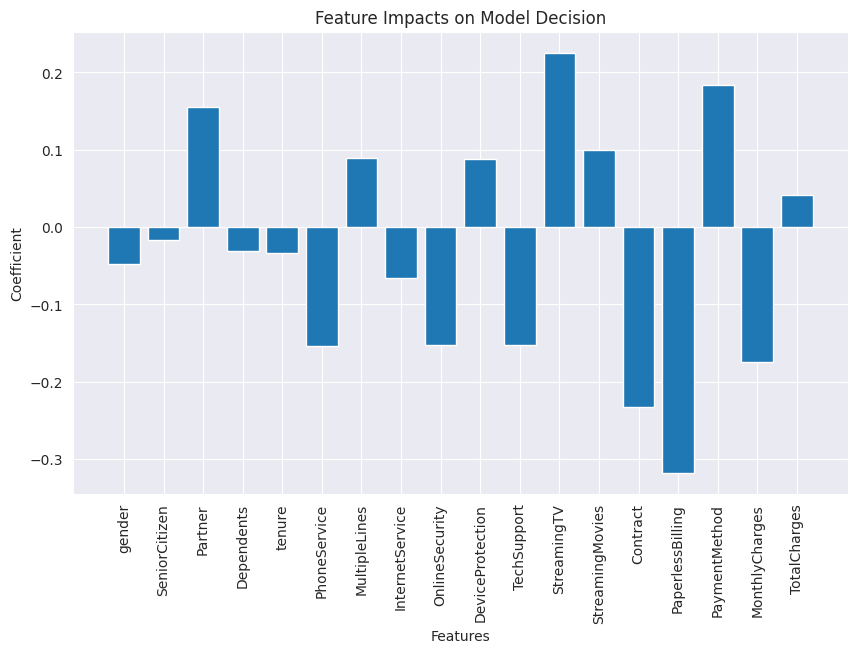

In [71]:
# Coefficients and feature names
coefficients = [-0.04756916596441864, -0.017372760274432474, 0.15511021057462107, -0.030964015173187125, -0.0339779110630372, -0.15384947382491454, 0.08890754759280671, -0.06649150026954014, -0.1526135840645733, 0.08767165781950373, -0.1526135840645733, 0.22567020861452716, 0.09907075119753213, -0.23234942679440362, -0.3176370815250714, 0.18435840586497682, -0.175209716255411, 0.0419310406023068]
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_names, coefficients)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient')
ax.set_title('Feature Impacts on Model Decision')
plt.xticks(rotation='vertical')
plt.show()


### Insights on the interpreter

Features with positive coefficients:

Partner: A positive coefficient suggests that having a partner increases the likelihood of the predicted outcome.
MultipleLines: A positive coefficient indicates that having multiple phone lines increases the likelihood of the predicted outcome.
DeviceProtection: A positive coefficient suggests that having device protection increases the likelihood of the predicted outcome.
StreamingTV: A positive coefficient indicates that having streaming TV increases the likelihood of the predicted outcome.
StreamingMovies: A positive coefficient suggests that having streaming movies increases the likelihood of the predicted outcome.
PaymentMethod: A positive coefficient indicates that certain payment methods increase the likelihood of the predicted outcome.
Features with negative coefficients:

Gender: A negative coefficient suggests that being female decreases the likelihood of the predicted outcome.
SeniorCitizen: A negative coefficient indicates that being a senior citizen decreases the likelihood of the predicted outcome.
Dependents: A negative coefficient suggests that having dependents decreases the likelihood of the predicted outcome.
Tenure: A negative coefficient indicates that a longer tenure decreases the likelihood of the predicted outcome.
PhoneService: A negative coefficient suggests that having phone service decreases the likelihood of the predicted outcome.
InternetService: A negative coefficient indicates that having internet service decreases the likelihood of the predicted outcome.
OnlineSecurity: A negative coefficient suggests that having online security decreases the likelihood of the predicted outcome.
TechSupport: A negative coefficient indicates that having tech support decreases the likelihood of the predicted outcome.
Contract: A negative coefficient suggests that having a longer contract duration decreases the likelihood of the predicted outcome.
PaperlessBilling: A negative coefficient indicates that using paperless billing decreases the likelihood of the predicted outcome.
MonthlyCharges: A negative coefficient suggests that higher monthly charges decrease the likelihood of the predicted outcome.
TotalCharges: A positive coefficient indicates that higher total charges increase the likelihood of the predicted outcome.
The intercept term (-0.06534620607998345) represents the baseline or inherent probability of the predicted outcome when all other features are zero or not considered.



In [76]:
#creating my pipeline
# Define the scaler and encoder
scaler = StandardScaler()
encoder = OrdinalEncoder()

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('encoder', encoder),
    ('model', logreg_model),
])
print(pipeline)


Pipeline(steps=[('scaler', StandardScaler()), ('encoder', OrdinalEncoder()),
                ('model', LogisticRegression())])


In [78]:
# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ('encoder', OrdinalEncoder()),
    ('classifier', LogisticRegression())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_eval)

y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [81]:
# Defining the models
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()
gbm_model = GradientBoostingClassifier()

# Define the scaler and encoder
scaler = StandardScaler()
encoder = OrdinalEncoder()

# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('encoder', encoder),
])

# Save the models, scaler, encoder, and pipeline
models = [knn_model, logreg_model, gbm_model]
components = [scaler, encoder]
file_prefix = 'my_project'

for idx, model in enumerate(models):
    with open(f'{file_prefix}_model_{idx}.pkl', 'wb') as f:
        pickle.dump(model, f)

for idx, component in enumerate(components):
    with open(f'{file_prefix}_{type(component).__name__}_{idx}.pkl', 'wb') as f:
        pickle.dump(component, f)

with open(f'{file_prefix}_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print('Project components exported successfully.')

Project components exported successfully.
